In [1]:
# Boiler PLate of Libraries
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns
import math
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
# load Dummy
names=sns.get_dataset_names()
print(names)
df=sns.load_dataset('flights')
df.head()

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [3]:
# Storing Features Categorically
categoric_features=[]
numeric_features=[]
categoric_features=df.select_dtypes(exclude=['number', 'datetime']).columns.values
numeric_features=df.select_dtypes(include=['number']).columns.values

In [4]:
if(len(categoric_features)+len(numeric_features)!=len(df.columns)):
    print("Sum Features are not Covered")
else:
    print("All Features Covered")

All Features Covered


# Univariate Data Explore

## - Categoric Data

In [5]:
# Count of Class
for i in range(len(categoric_features)):
    print(f"for Feature name- {categoric_features[i]},Classes are ")
    print(df.loc[:,categoric_features[i]].unique())
    print(f"and its count is")
    print(df.loc[:,categoric_features[i]].value_counts())

for Feature name- month,Classes are 
['Jan', 'Feb', 'Mar', 'Apr', 'May', ..., 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Length: 12
Categories (12, object): ['Jan', 'Feb', 'Mar', 'Apr', ..., 'Sep', 'Oct', 'Nov', 'Dec']
and its count is
month
Jan    12
Feb    12
Mar    12
Apr    12
May    12
Jun    12
Jul    12
Aug    12
Sep    12
Oct    12
Nov    12
Dec    12
Name: count, dtype: int64


#### Plots

Showing Frequency for each class


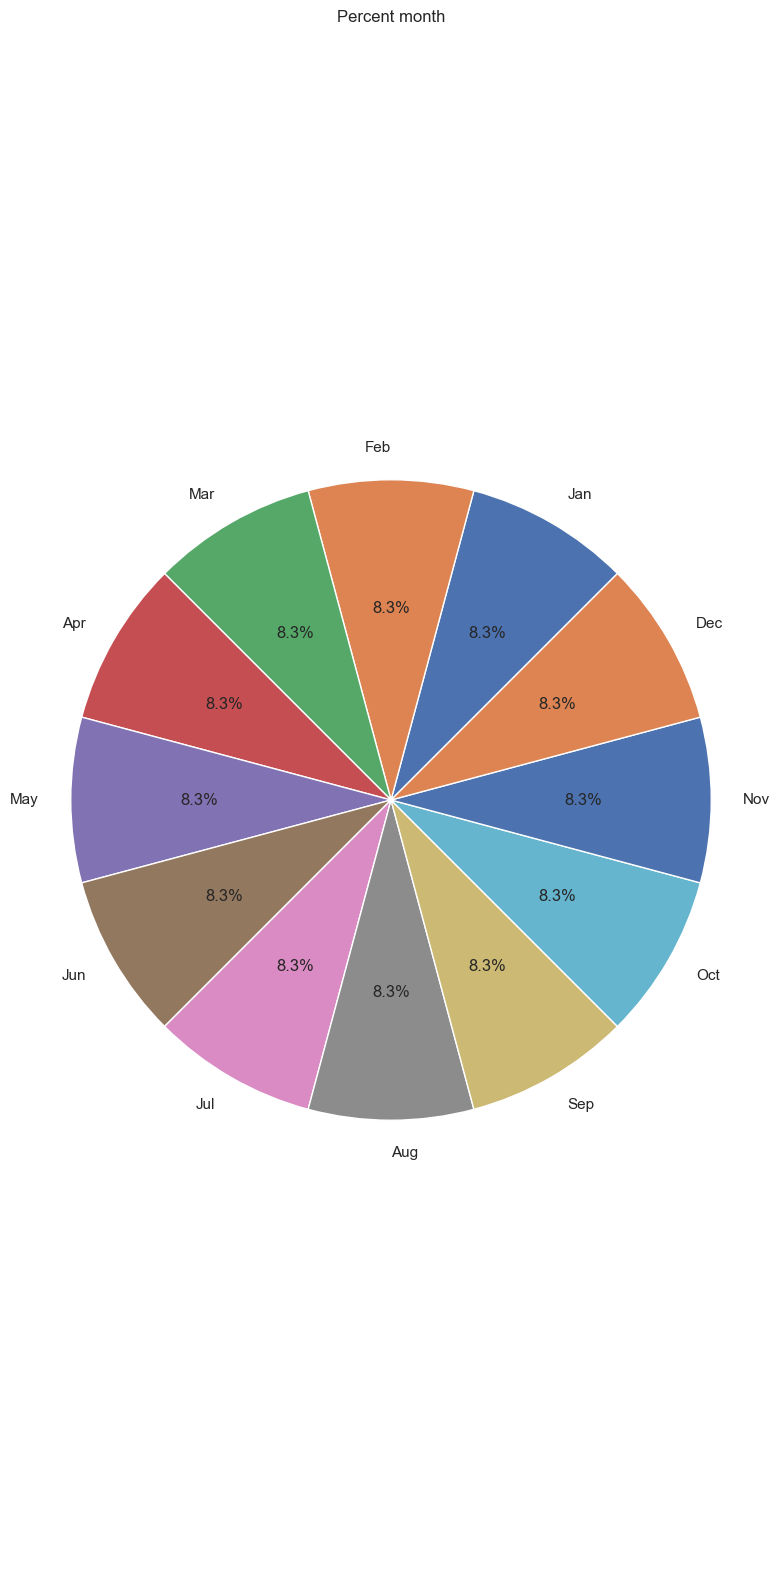

In [6]:
#Pie Plot (frequency vs class)
n=len(categoric_features)
plt.figure(figsize=(20, 20))
print("\033[1mShowing Frequency for each class\033[0m")
for i in range(len(categoric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    plt.pie(df.loc[:,categoric_features[i]].value_counts(), labels=df.loc[:,categoric_features[i]].value_counts().index, autopct='%1.1f%%', startangle=45)
    plt.axis('equal')  
    plt.title(f"Percent {categoric_features[i]}")

Showing Frequency for each class


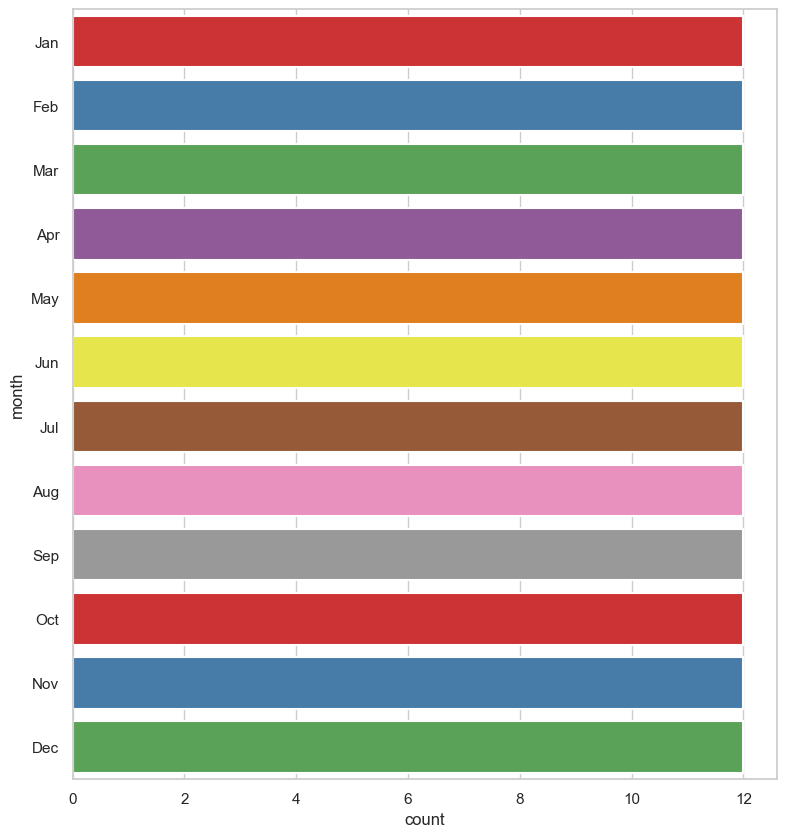

In [7]:
#Count Plot (frequency vs class)
n=len(categoric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing Frequency for each class\033[0m")
for i in range(len(categoric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[categoric_features[i]]
    palette = {category: color for category, color in zip(temp.unique(), sns.color_palette(f"Set{1+(i%3)}", len(temp.unique())))}
    sns.countplot(y=temp, palette=palette,hue=temp, linewidth=1.5)

## - Numeric Data

In [8]:
#Metrices
X=df.describe()

# ----------------

def nthmoment(V,n):
    if(len(V)==0):
        return -1;
    mean=np.mean(V)
    return np.sum((V-mean)**n)/(len(V)+1)
def kurtosis(V):
    return nthmoment(V,4)/(nthmoment(V,2)**2)
for i in range(4):
    dic={}
    for val in X.columns:
       dic.update({val:nthmoment(df[val],i+1)})
    X.loc[f"{i+1}th moment"]=dic
dic={}
for val in X.columns:
    dic.update({val:kurtosis(df[val])})
X.loc['Kurtosis']=dic
def t(kurtosis):
    kurtosis-=3
    if(abs(kurtosis)<1e-1):
        return "Mesokurtic"
    elif (kurtosis>0):
        return "Leptokurtic"
    else:
        return "platokurtic"
dic={}
for val in X.columns:
    dic.update({val:t(kurtosis(df[val]))})
X.loc['Type']=dic
def skewness(V):
    return nthmoment(V,3)/(np.std(V))
dic={}
for val in numeric_features:
    dic.update({val:skewness(df[val])})
X.loc['Skewness']=dic
# -------------

print("Numeric Data Metrix ")
X

Numeric Data Metrix 


,year,passengers
count,144.0,144.0
mean,1954.5,280.298611
std,3.464102,119.966317
min,1949.0,104.0
25%,1951.75,180.0
50%,1954.5,265.5
75%,1957.25,360.5
max,1960.0,622.0
1th moment,0.0,0.0
2th moment,11.834483,14193.407998


#### Plots

Showing BoxPlot for each Numeric Feature


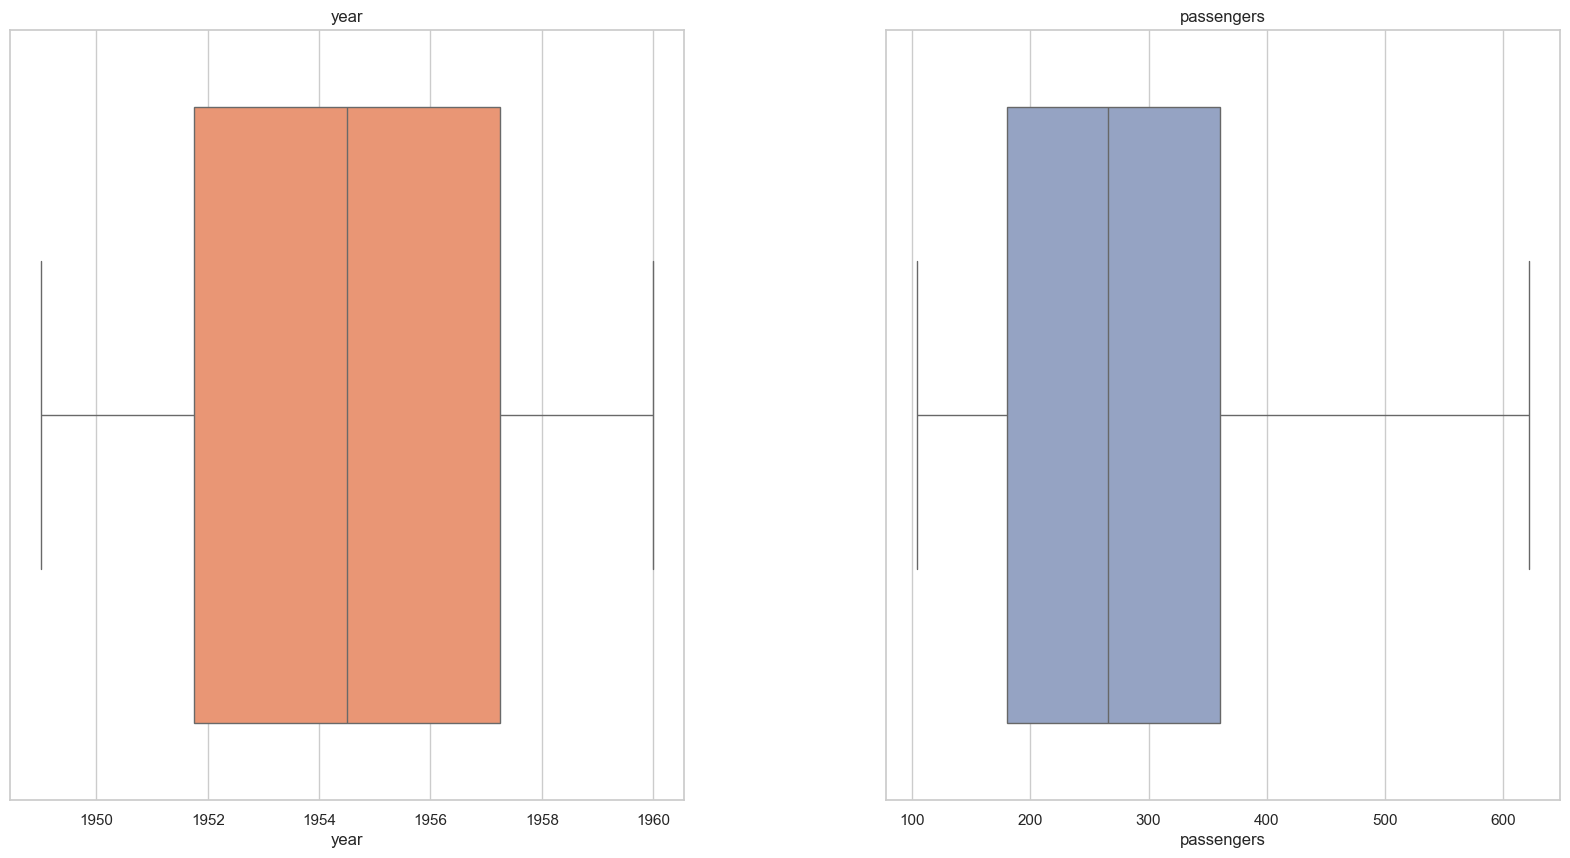

In [9]:
# BoxPlots
n=len(numeric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing BoxPlot for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")

    sns.boxplot(data=temp,orient='h',color=palette[i%3+1])
    plt.title(numeric_features[i])
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

Showing Distribution Plots for each Numeric Feature


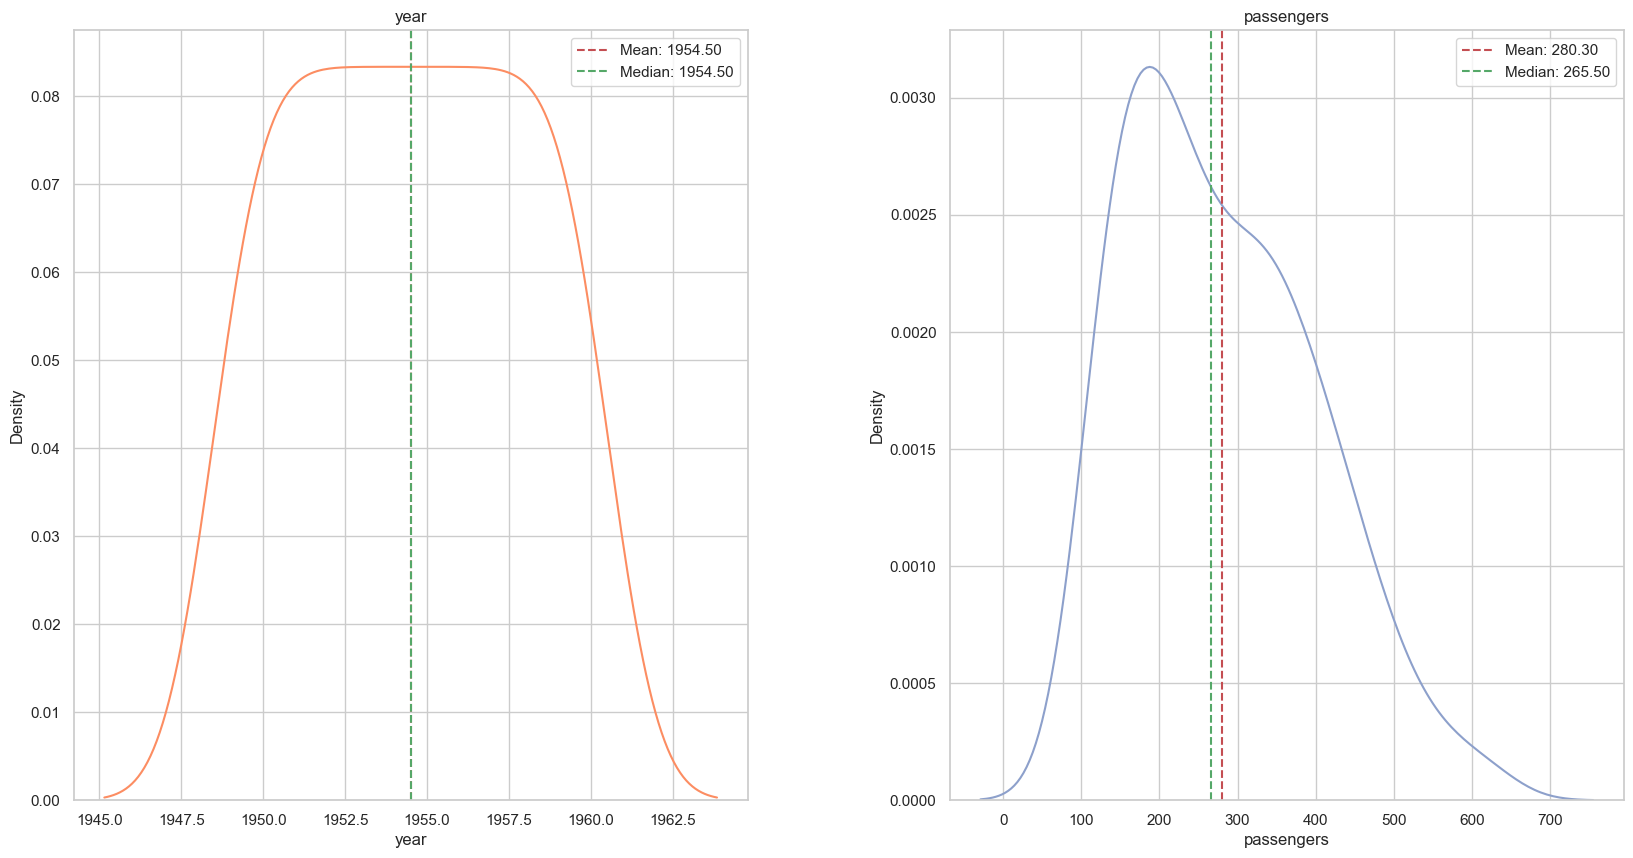

In [10]:
# DistributionPlots
n=len(numeric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing Distribution Plots for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")

    sns.kdeplot(temp,color=palette[i%3+1])
    mean_val = df[numeric_features[i]].mean()
    median_val = df[numeric_features[i]].median()
    
    # Annotate mean and median values
    plt.axvline(mean_val, color='r', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='g', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.title(numeric_features[i])
    plt.legend()
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

Showing Histograms for each Numeric Feature


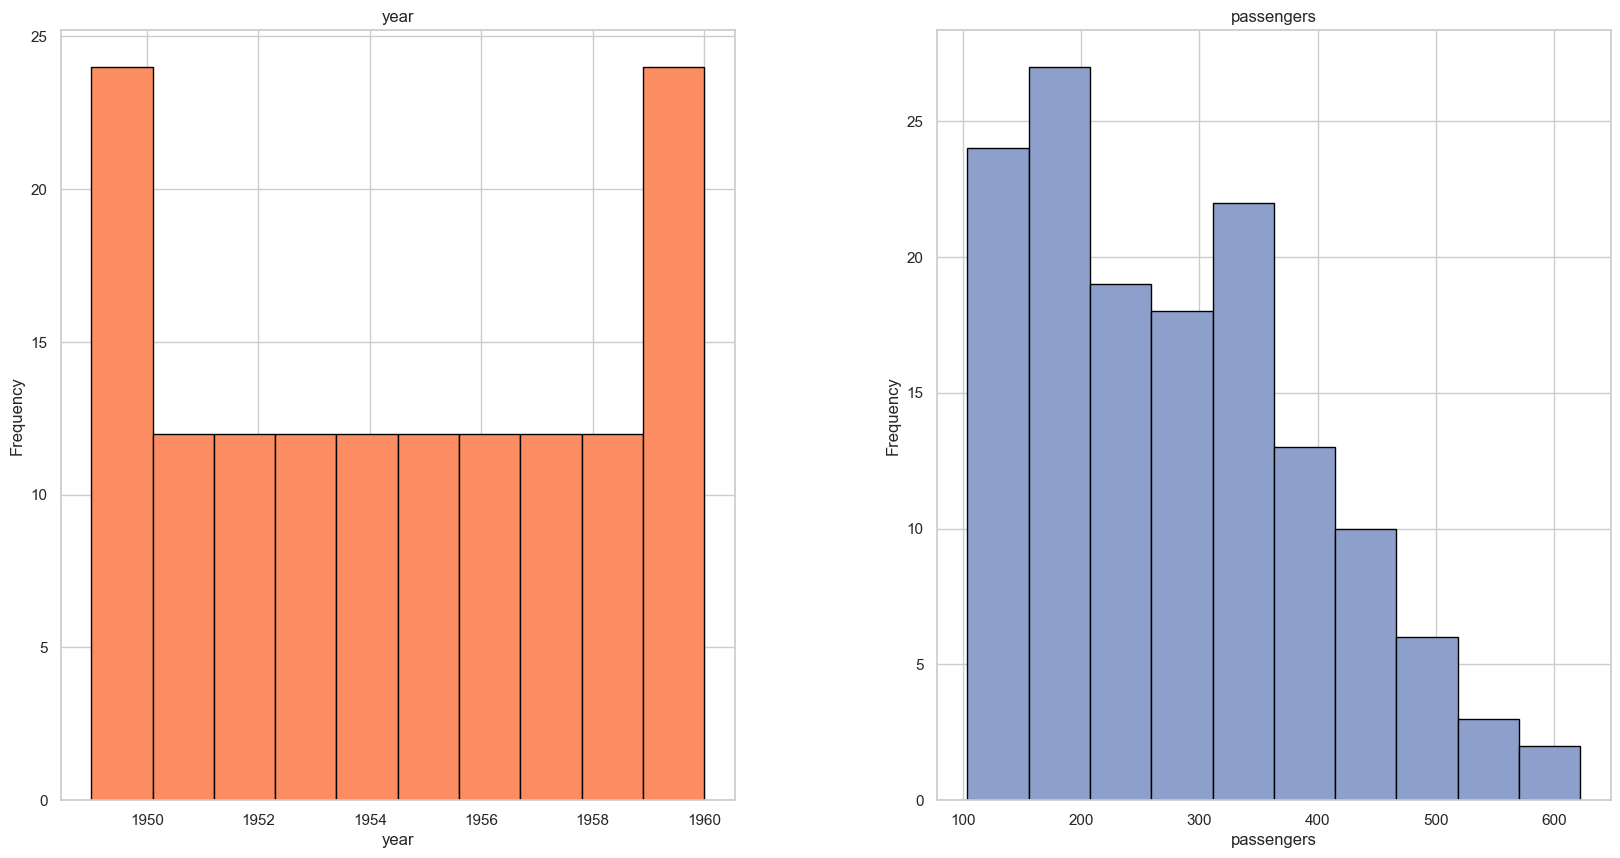

In [11]:
# HistPlots
n=len(numeric_features)
plt.figure(figsize=(20, 10))
print("\033[1mShowing Histograms for each Numeric Feature\033[0m")
for i in range(len(numeric_features)):
    plt.subplot(math.ceil(n/2),2,i+1)
    temp=df[numeric_features[i]]
    palette = sns.color_palette("Set2")
    plt.hist(temp, bins=10, color=palette[i%3+1], edgecolor='black')
    plt.xlabel(numeric_features[i])
    plt.ylabel('Frequency')
    plt.title(numeric_features[i])
    plt.subplots_adjust(hspace=0.7, wspace=0.3)

# Bivariate Data Explore

## - Categoric Data vs Categoric Data

In [12]:
categoric_features

array(['month'], dtype=object)

In [13]:
N=0
for i in range(len(categoric_features)):
    for j in range(i+1,len(categoric_features)):
        N+=1
        print(pd.crosstab(df[categoric_features[i]],df[categoric_features[j]]),"\n     -----\n")

###### advanced cross table combinations

In [14]:
for i in range(len(categoric_features)):
    x=[]
    for j in range(i+1,len(categoric_features)):
        x.append(df[categoric_features[j]]) 
        print(pd.crosstab(categoric_features[i],x),"\n")

#### Plots

In [15]:
# Cross Table based bars
num_features = len(categoric_features)
num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows needed

plt.figure(figsize=(10, 20))

for idx, (i, j) in enumerate(zip(categoric_features[:-1], categoric_features[1:]), start=1):
    plt.subplot(num_rows, 2, idx)
    cross_tab = pd.crosstab(df[i], df[j])
    cross_tab.plot(kind='bar', ax=plt.gca(), legend=True) 
    plt.title(f'{i} vs {j}', fontsize=18)
    plt.xlabel(i, fontsize=18)
    plt.ylabel(j, fontsize=18)
    plt.xticks(rotation=45)  
    plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.tight_layout()
plt.show()

<Figure size 1000x2000 with 0 Axes>

In [16]:
# SNS HeatMaps
num_features = len(categoric_features)
num_rows = num_features // 2 + num_features % 2  # Calculate the number of rows needed

plt.figure(figsize=(10, 20))

for idx, (i, j) in enumerate(zip(categoric_features[:-1], categoric_features[1:]), start=1):
    plt.subplot(num_rows, 2, idx)
    cross_tab = pd.crosstab(df[i], df[j])
    sns.heatmap(cross_tab)
    plt.xlabel(i, fontsize=18)
    plt.ylabel(j, fontsize=18)
    plt.xticks(rotation=45)  
    plt.subplots_adjust(hspace=0.6, wspace=0.3)

plt.tight_layout()
plt.show()

<Figure size 1000x2000 with 0 Axes>

## - Categoric Data vs Numerical Data

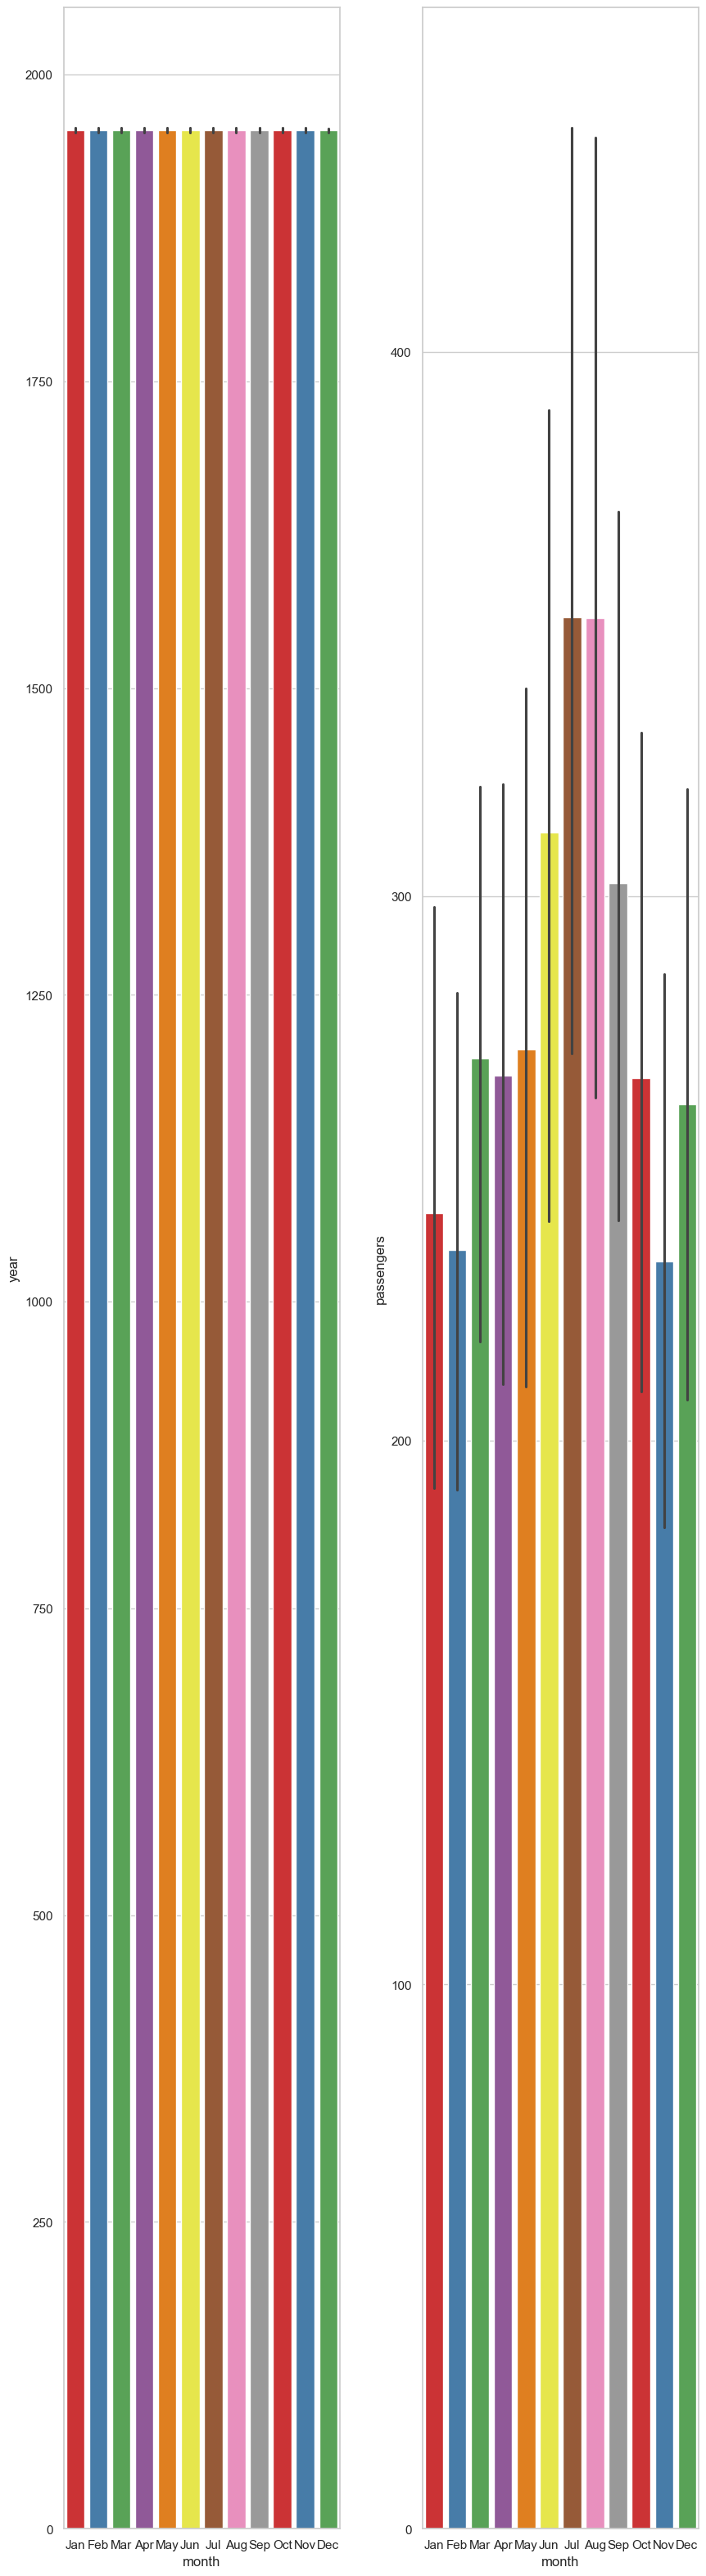

In [17]:
idx = 1
plt.figure(figsize=(10, 40))

n = len(categoric_features) * len(numeric_features)
for i in range(len(categoric_features)):
    for j in range(len(numeric_features)):
        plt.subplot(math.ceil(n / 2), 2, idx)
        idx += 1
        temp = df[categoric_features[i]]
        palette = {category: color for category, color in zip(temp.unique(), sns.color_palette(f"Set{1 + (i % 3)}", len(temp.unique())))}
        sns.barplot(x=categoric_features[i], y=numeric_features[j], data=df, palette=palette,hue=temp,legend=False)
        plt.subplots_adjust(hspace=0.6, wspace=0.3)
plt.show()


## - Numerical Data vs Numerical Data

Showing ScatterPlots for each Numeric Feature


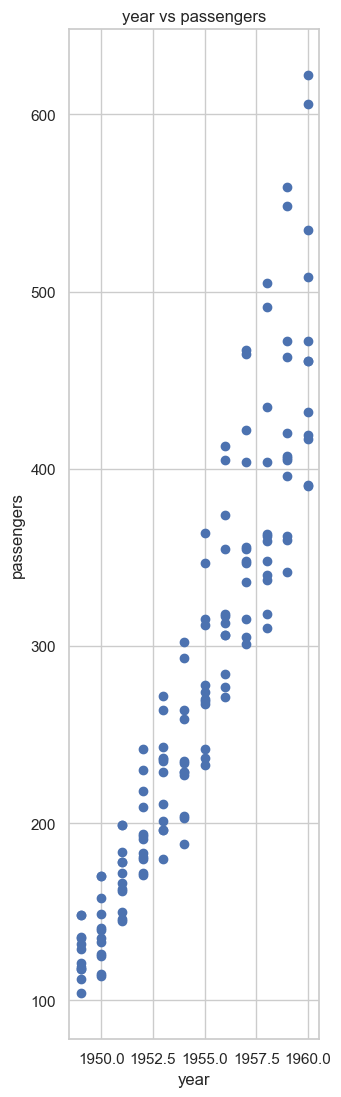

In [18]:
# Plots Scattering
n = len(numeric_features)
idx = 1
plt.figure(figsize=(20, 80))
print("\033[1mShowing ScatterPlots for each Numeric Feature\033[0m")
for i in range(n):
    for j in range(i + 1, n):
        plt.subplot(n*n, 5, idx)
        idx += 1
        plt.scatter(df[numeric_features[i]], df[numeric_features[j]])
        plt.xlabel(numeric_features[i])
        plt.ylabel(numeric_features[j])
        plt.title(f"{numeric_features[i]} vs {numeric_features[j]}")
        plt.subplots_adjust(hspace=0.7, wspace=0.3)

plt.show()